In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# seed 값 설정
seed = 3

np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
from google.colab import files

Uploaded = files.upload()
df_pre = pd.read_csv("wine.csv", header = None)

Saving wine.csv to wine.csv


In [5]:
df = df_pre.sample(frac = 0.15)

In [6]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:,12]

In [7]:
# 모델의 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = "relu"))
model.add(Dense(12, activation= "relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [8]:
# 모델 컴파일
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [9]:
# 모델 저장 폴더 설정
modelpath = "./model/{epochs:02d}-{val_loss:.5f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = "val_loss", verbose = 1, save_best_only=True)

In [10]:
# 모델실행 및 저장
history = model.fit(X, Y, validation_split = 0.33, epochs = 3500, batch_size = 500)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
653/653 [==============================] - 0s 25us/step - loss: 0.0415 - accuracy: 0.9832 - val_loss: 0.0859 - val_accuracy: 0.9720
Epoch 1002/3500
653/653 [==============================] - 0s 25us/step - loss: 0.0417 - accuracy: 0.9832 - val_loss: 0.0830 - val_accuracy: 0.9720
Epoch 1003/3500
653/653 [==============================] - 0s 25us/step - loss: 0.0434 - accuracy: 0.9847 - val_loss: 0.0829 - val_accuracy: 0.9720
Epoch 1004/3500
653/653 [==============================] - 0s 25us/step - loss: 0.0414 - accuracy: 0.9832 - val_loss: 0.0861 - val_accuracy: 0.9752
Epoch 1005/3500
653/653 [==============================] - 0s 37us/step - loss: 0.0421 - accuracy: 0.9816 - val_loss: 0.0860 - val_accuracy: 0.9752
Epoch 1006/3500
653/653 [==============================] - 0s 29us/step - loss: 0.0406 - accuracy: 0.9832 - val_loss: 0.0823 - val_accuracy: 0.9783
Epoch 1007/3500
653/653 [==============================] - 0s 26us/step - loss: 0.0406 - acc

In [12]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history["val_loss"]

In [15]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history["accuracy"]

<function matplotlib.pyplot.show>

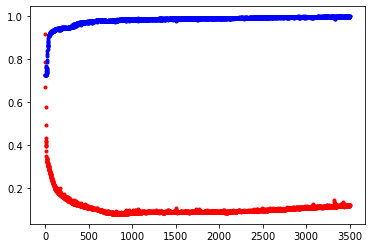

In [19]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3)
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3)

plt.show